# Sprawozdanie Laboratoria 0-3

## Jan Bronicki 249011


## Lab 0


### Cel

Celem laboratorium było zapoznanie się z generatorami liczb losowych z rozkładem jednostajnym opartego na przekształceniu piłokształtnym.


In [182]:
import numpy as np
import matplotlib.pyplot as plt

## Lab 0.1

Poniższe wykresy obrazują sposób generowania kolejnych liczb za pomocą przekształcenia piłokształtnego, w zależności od wartości parametru $z$.


In [183]:
def saw_generator(z, x0, n):
    x = np.empty(n)
    x_next = x0
    for i in range(0, x.shape[0]):
        x[i] = x_next
        x_next = np.round(x_next * z, 7) - np.floor(x_next * z)
    return x

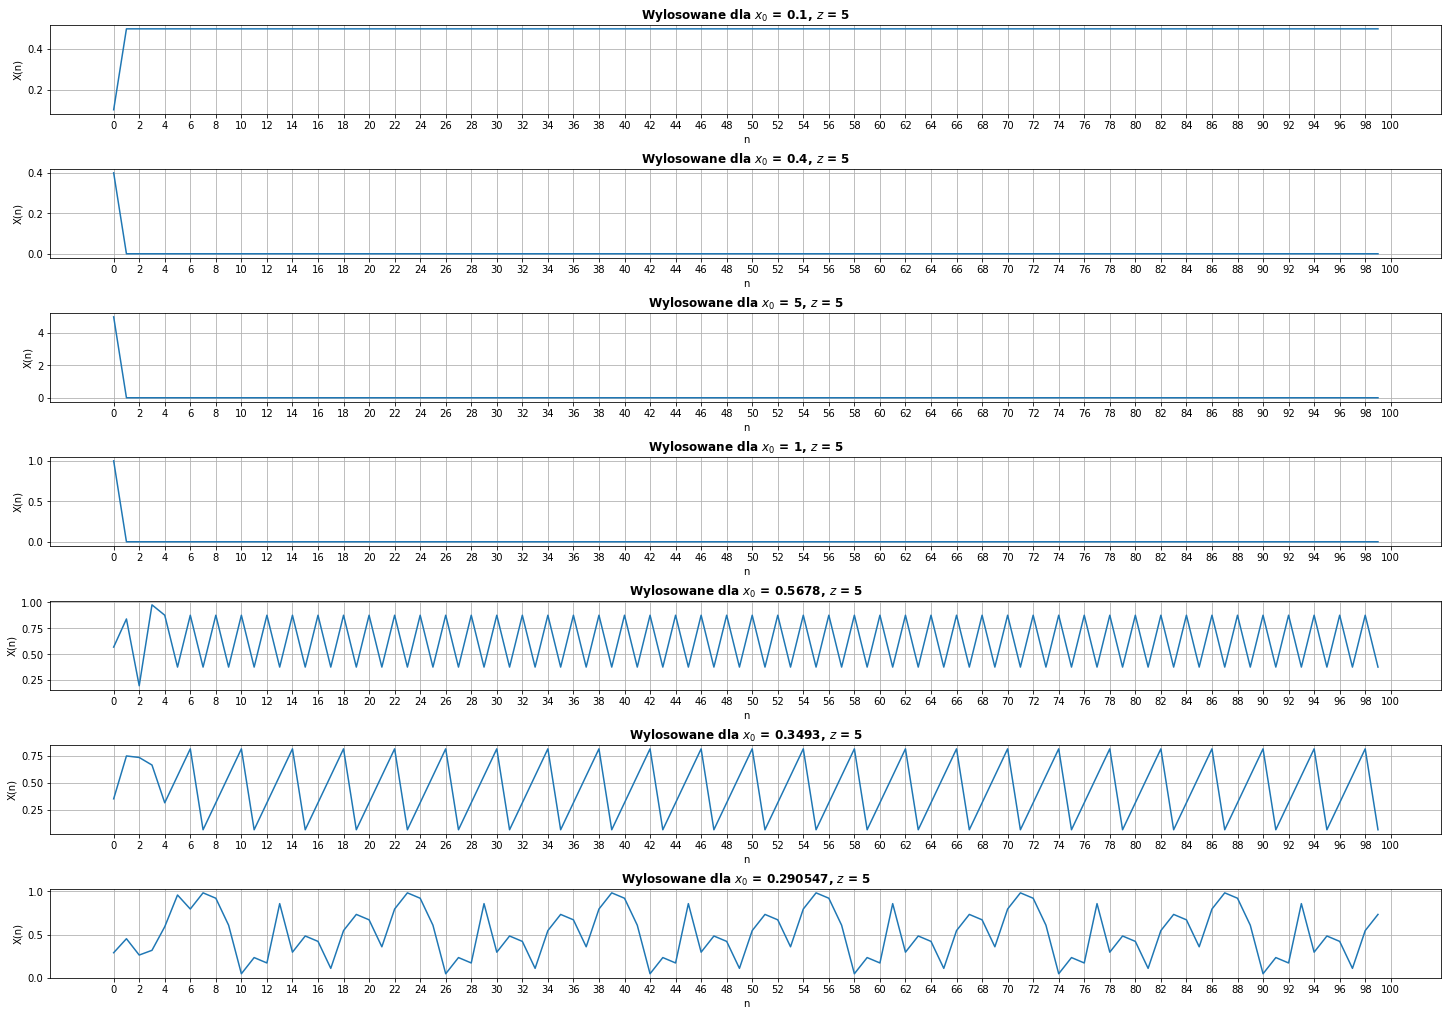

In [184]:
x0s = [0.1, 0.4, 5, 1, 0.5678, 0.3493, 0.290547]
z = 5
fig, axs = plt.subplots(len(x0s), figsize=(20, len(x0s) * 2), constrained_layout=True)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], 100)
    axs[i].plot(x, label=f"{i}")
    axs[i].set_title(f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")
    axs[i].grid(True)
plt.savefig("./lab0/z1/1.png")
plt.show()

Widzimy że w trzech ostatnich przypadkach okres wynosi następująca 3, 4 i 16.


Następnie widzimy jak dramatycznie kształt funkcji zostaje zmieniony poprzez zmianę parametru $z$:


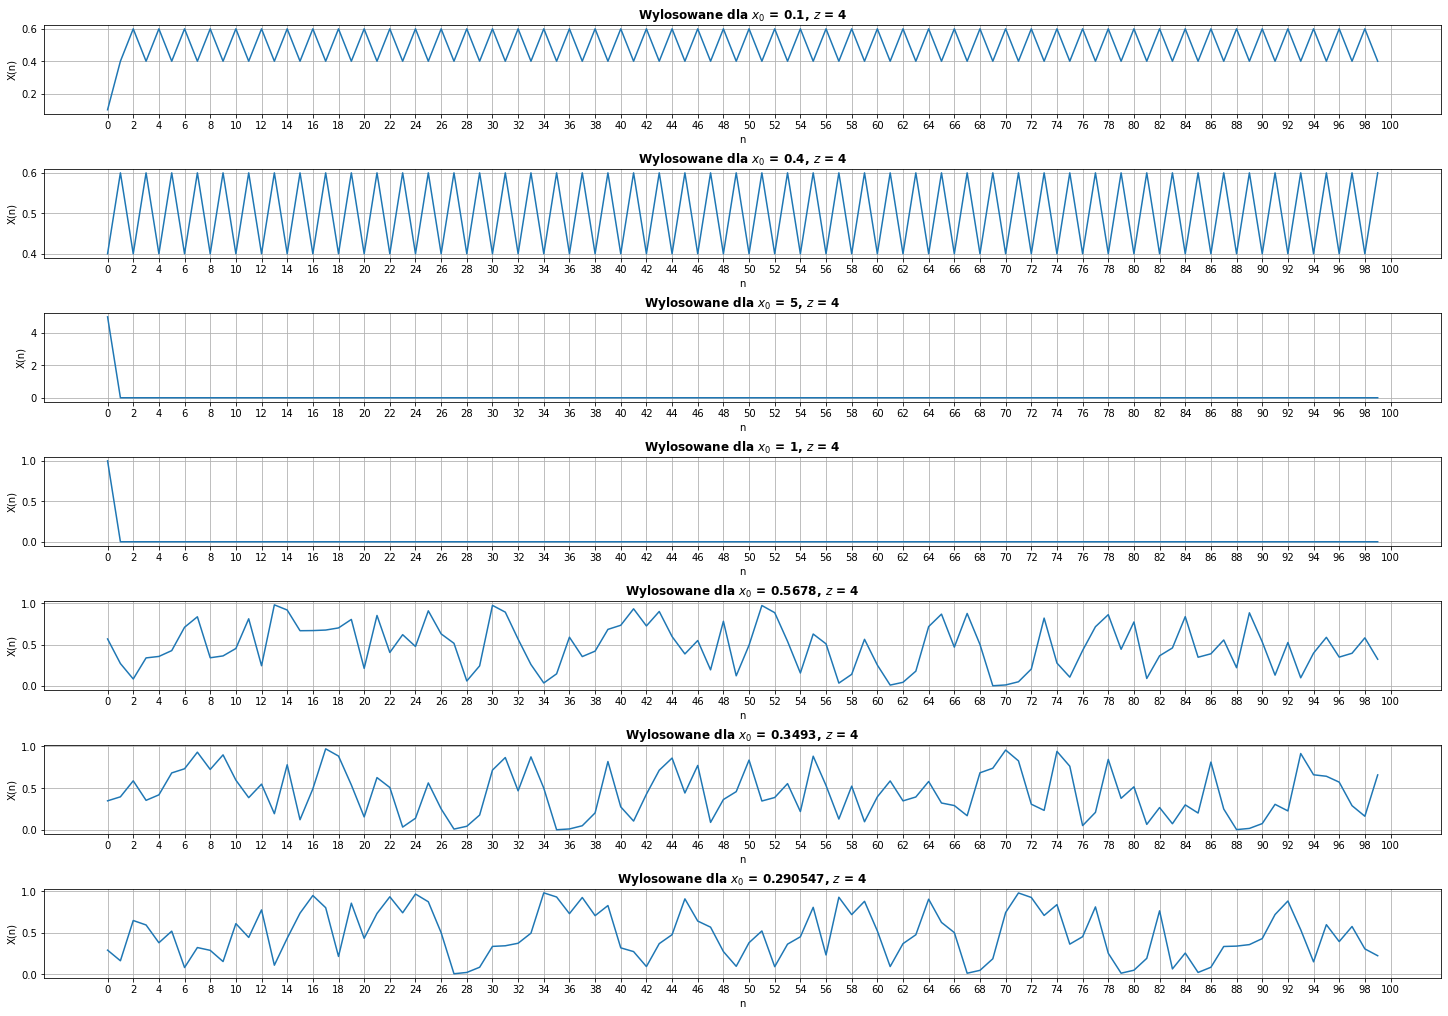

In [185]:
z = 4
fig, axs = plt.subplots(len(x0s), figsize=(20, len(x0s) * 2), constrained_layout=True)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], 100)
    axs[i].plot(x, label=f"{i}")
    axs[i].set_title(f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")
    axs[i].grid(True)
plt.savefig("./lab0/z1/2.png")
plt.show()

Dodatkowo możemy zaobserwować że wartości pozostają w przedziale od 0 do 1.


Na załączonym wykres przy n = 1000 otrzymujemy ładny rozkład jednostajny:


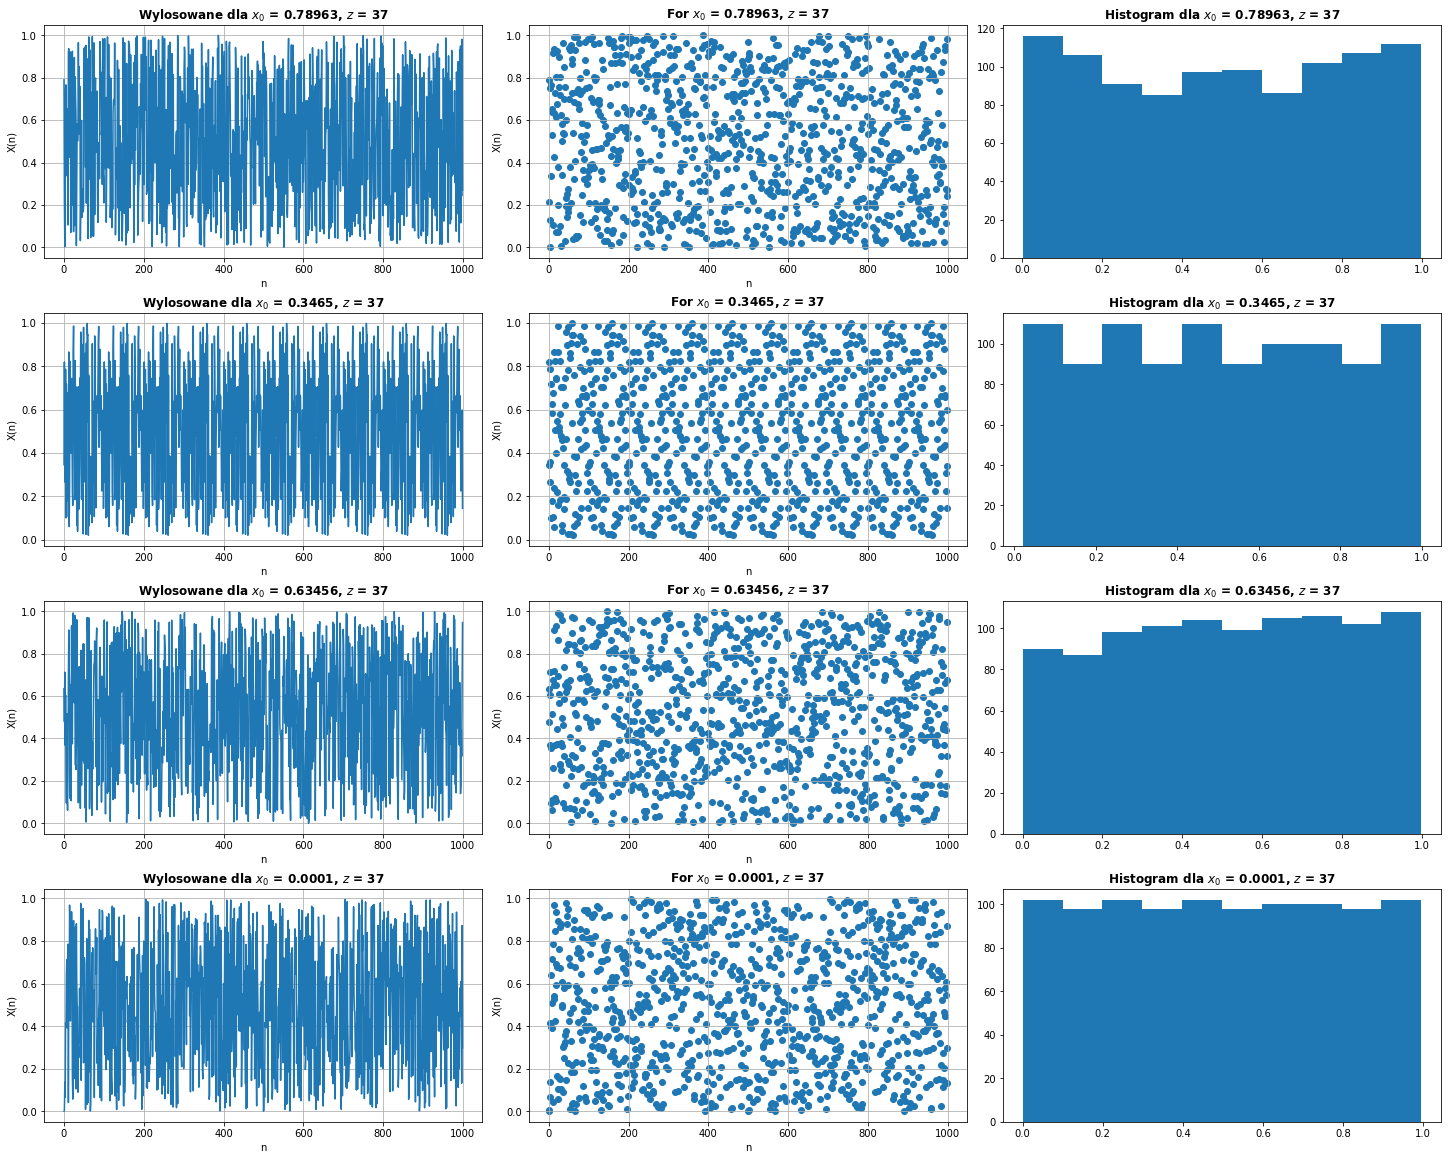

In [186]:
x0s = [0.78963, 0.3465, 0.63456, 0.0001]
z = 37
n = 1000
fig, axs = plt.subplots(
    len(x0s), 3, figsize=(20, len(x0s) * 4), constrained_layout=True
)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], n)
    axs[i, 0].plot(x, label=f"{i}")
    axs[i, 0].set_title(
        f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold"
    )
    axs[i, 0].set(xlabel="n", ylabel="X(n)")
    axs[i, 0].grid(True)

    axs[i, 1].scatter(list(range(n)), x)
    axs[i, 1].set_title(f"For $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
    axs[i, 1].set(xlabel="n", ylabel="X(n)")
    axs[i, 1].grid(True)

    axs[i, 2].hist(x)
    axs[i, 2].set_title(f"Histogram dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
plt.savefig("./lab0/z1/3.png")
plt.show()

## Lab 0.2

Generator oparty na równaniu:

$$
    X_{n+1} = (a_{0}X_{n}+a_{1}X_{n-1}+\ldots+a_{k}X_{n-k}+c)\% m
$$


In [187]:
def lin_generator(n, x0, a, c, m):
    x = np.array([x0])
    for Xn in range(n):
        x = np.append(x, (np.round(a * x[-1] + c, 7) % m))
    return x

### Współczynnik $k$
Współczynnik odpowiada za to ile wcześniej wygenerowanych próbek jest brane pod uwage podczas generowania wartości dla nowej próbki.
Widzimy ze dla $a=1$  dostajemy ksztalt piloksztaltny:

In [188]:
def plot_lin_rng(n, x0, a, c, m, z, p):
    x = lin_generator(n, x0, a, c, m)
    fig, axs = plt.subplots(1, 2, figsize=(20, 4), constrained_layout=True)
    axs[0].plot(x, "-o")
    axs[0].grid(True)
    axs[0].set(xlabel="Numer próbki", ylabel="Wartość próbki")
    axs[1].hist(x)
    axs[1].set(xlabel="Wartośc próbki", ylabel="Liczba próbek o danej wartości")
    fig.savefig(f"./lab1/z{z}/{p}.png")
    plt.show()

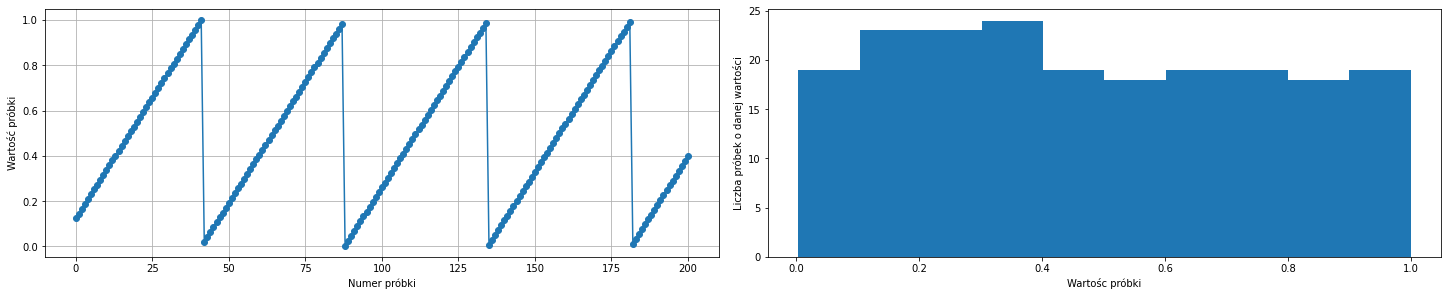

In [189]:
# Przyjeto
x0 = 0.12345
n = 200
c = 0.02137
m = 1
a = 1
gnu_a = 69069  # Parametr uzywany w GNU Compiler Collection
plot_lin_rng(n, x0, a, c, m, 2, 1)
# plt.savefig("./lab0/z2/1.png")

Dla $a=2$

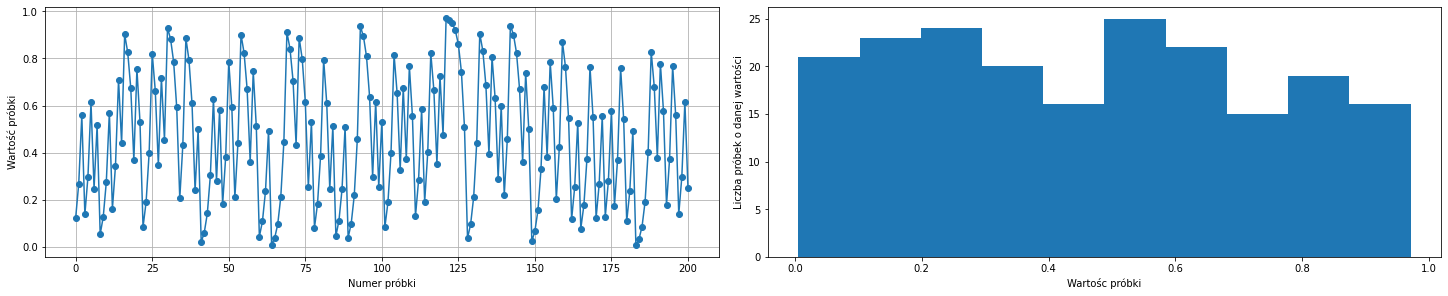

In [190]:
# Przyjeto
a = 2
plot_lin_rng(n, x0, a, c, m, 2, 2)
# plt.savefig("./lab0/z2/2.png")

Dla $a=3$

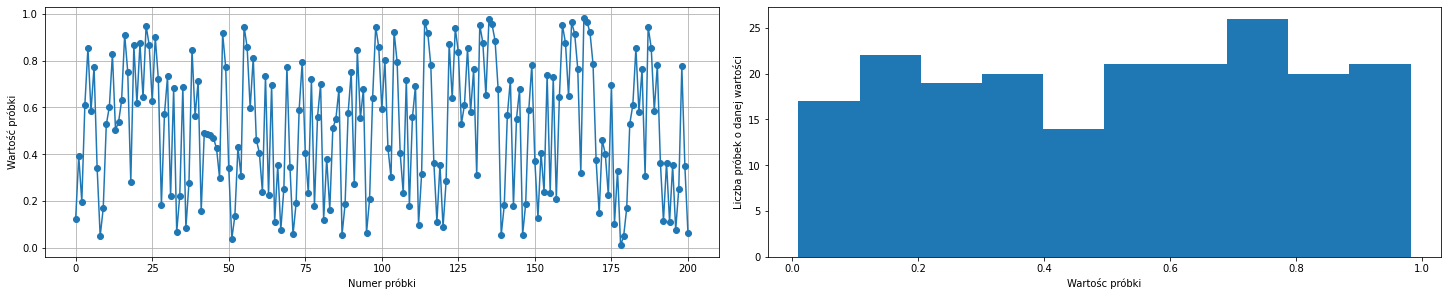

In [191]:
# Przyjeto
a = 3
plot_lin_rng(n, x0, a, c, m, 2, 3)
# plt.savefig("./lab0/z2/3.png")

Dla $a=69069$
Co jest wartością uywaną w GNU Compiler Collection

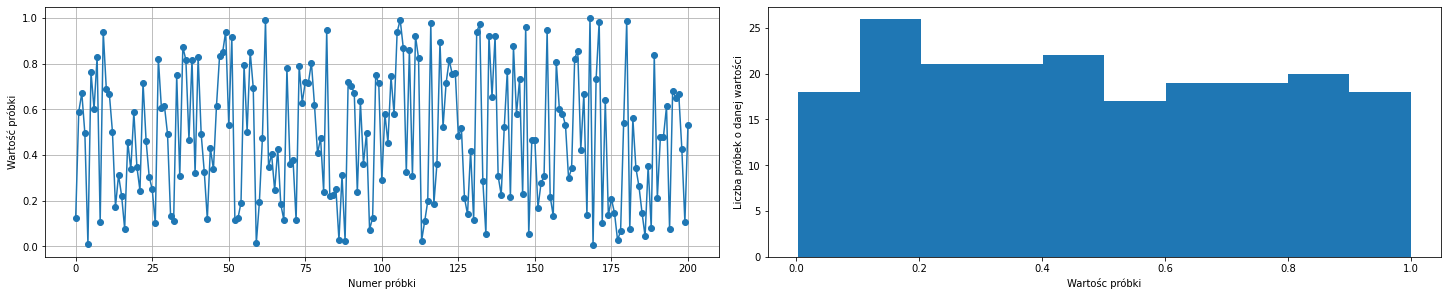

In [192]:
# Przyjeto
a = 3
plot_lin_rng(n, x0, gnu_a, c, m, 2, 4)
# plt.savefig("./lab0/z2/4.png")

## Wpływ współczynnika $m$

Współczynnik $m$ odpowiada za zakres wartości generowanych liczb.

In [193]:
# Przyjeto
k = 3

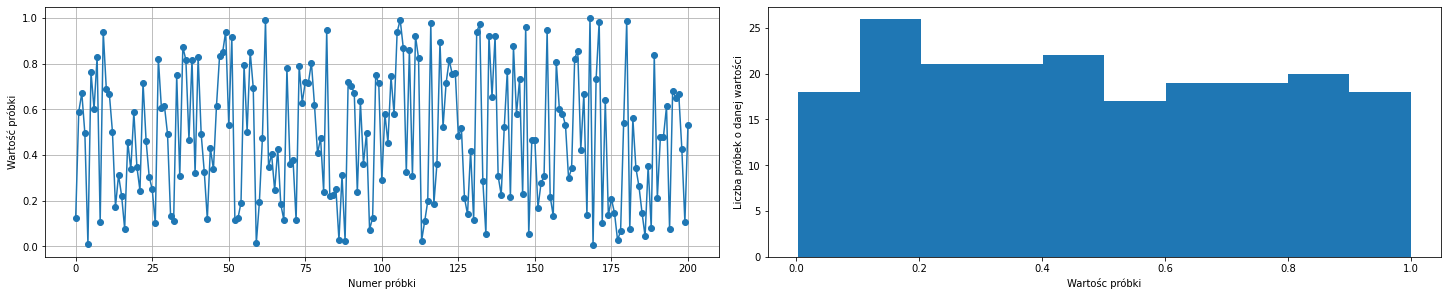

In [194]:
m = 1
plot_lin_rng(n, x0, gnu_a, c, m, 3, 1)
# plt.savefig("./lab0/z3/1.png")

Dla $m=10$

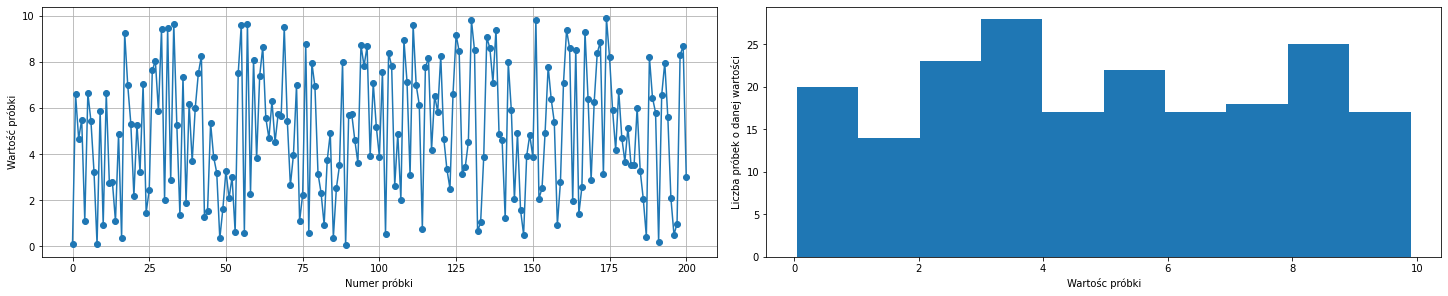

In [195]:
m = 10
plot_lin_rng(n, x0, gnu_a, c, m, 3, 2)
# plt.savefig("./lab0/z3/2.png")

Dla $m=0.1$

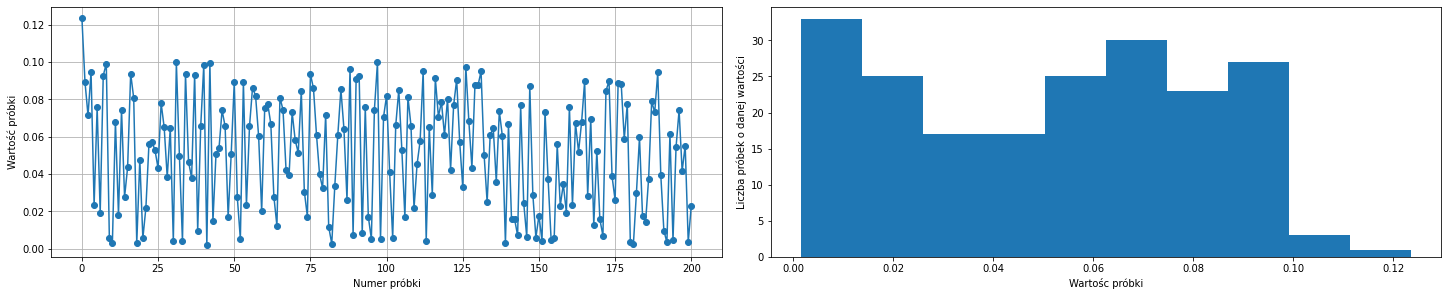

In [196]:
m = 0.1
plot_lin_rng(n, x0, gnu_a, c, m, 3, 3)
# plt.savefig("./lab0/z3/3.png")

## Lab 1
## Generacja liczb losowych metodą odwracania dystrybuanty

### Cel ćwiczenia
Celem ćwiczenia jest zaimplementowanie generator liczb pseudolosowych bazującego na metodzie
odwrotnej dystrybuanty.

Rozkład gęstości prawdopodobieństwa ma postać:

$$
f(x) =
  \begin{cases}
    2x       & \quad x\in [0,1]\\
    0  & \quad x \in (-\infty,0)\cup(1,\infty)
  \end{cases}
$$

Całka w przedziale $x\in [0,1]$ wynosi $F(x)=x^{2}$.
Dzięki czemu moemy przedstawić dystrybuantę w taki sposób:

$$
F(x) =
  \begin{cases}
    0       & \quad x \in (-\infty,0)\\
    x^{2}  & \quad x\in [0,1]\\
    1 & x \quad x \in(1, \infty)
  \end{cases}
$$

Na tej podstawie odwrotna dystrybuanta w przedziale $x \in [0,1]$ wynosi:

$$
F^{-1}(y)=\sqrt{y}
$$

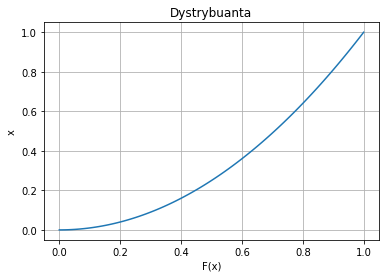

In [197]:
x = np.linspace(0, 1, 100)
y = x**2
plt.plot(x, y)
plt.grid(True)
plt.title("Dystrybuanta")
plt.xlabel("F(x)")
plt.ylabel("x")
plt.savefig("./lab1/z1/1.png")
plt.show()

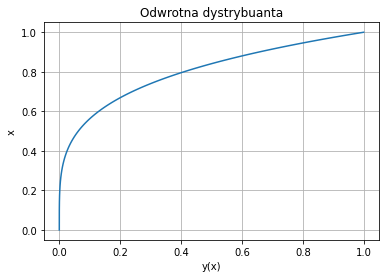

In [198]:
plt.plot(y, np.sqrt(x))
plt.grid(True)
plt.title("Odwrotna dystrybuanta")
plt.ylabel("x")
plt.xlabel("y(x)")
plt.savefig("./lab1/z1/2.png")
plt.show()

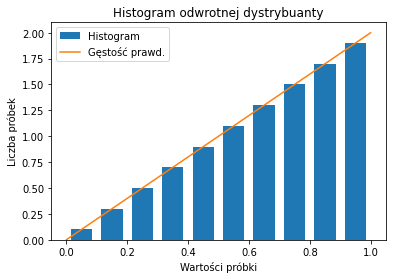

In [199]:
plt.hist(
    np.sqrt(x),
    density=True,
    label="Histogram",
    rwidth=0.7,
    bins=10,
)
plt.plot(x, 2 * x, label="Gęstość prawd.")
plt.legend()
plt.title("Histogram odwrotnej dystrybuanty")
plt.xlabel("Wartości próbki")
plt.ylabel("Liczba próbek")
plt.savefig("./lab1/z2/3.png")
plt.show()

## Lab1.2

Rozkład prawdopodobieństwa generatora ma postać:

$$
f(x) =
  \begin{cases}
    x+1       & \quad x\in (-1,0)\\
    -x+1         & \quad x \in [0, 1)\\
    0         & \quad x \notin (-1,1)
  \end{cases}
$$

Dystrybuanta:

$$
F(x) =
  \begin{cases}
    0       & \quad x \in [-\infty,0)\\
    x^{2}   & \quad x\in (-1, 0)\\
    0       & \quad x \notin (-\infty, -1]\\
    1       & \quad x \in [1, \infty)
  \end{cases}
$$

Wyznaczono odwrotną dystrybuantę $x \in [0,1]$:
$$
F(x) =
  \begin{cases}
    \sqrt{2x}-1       & \quad x \in [0,\frac{1}{2}\\
    1-\sqrt{2-2x}   & \quad x\in (\frac{1}{2}, 1]\\
  \end{cases}
$$



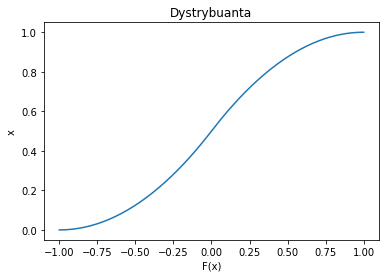

In [200]:
n = 200
x = np.linspace(-1, 1, n)


def f(x):
    return (-x + 1) * (x >= 0) * (x < 1) + (x + 1) * (x > -1) * (x < 0)


def F(x):
    return (
        ((1 / 2) - ((x**2) / 2) + x) * (x >= 0) * (x < 1)
        + (x > -1) * (x < 0) * ((1 / 2) + ((x**2) / 2) + x)
        + (x >= 1) * 1
    )


def invF(x):
    return (
        (np.sqrt(2 * x) - 1) * (x >= 0) * (x <= 0.5)
        + (1 - np.sqrt(2 - (x * 2))) * (x > 0.5) * (x <= 1)
        - (x < -1)
    )


plt.title("Dystrybuanta")
plt.xlabel("F(x)")
plt.ylabel("x")
plt.plot(x, F(x))
plt.show()

/var/folders/7g/57qghjmj7x3ft0pqvb_k6lcw0000gn/T/ipykernel_27634/3553365497.py:18: RuntimeWarning: invalid value encountered in sqrt
  return  (np.sqrt(2 * x) - 1) * (x >= 0) * (x <= 0.5) + (1 - np.sqrt(2 - (x * 2))) * (x > 0.5) * (x <= 1) - (x < -1)


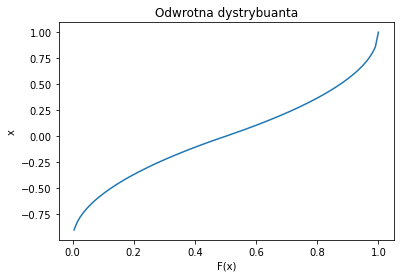

In [201]:
plt.title("Odwrotna dystrybuanta")
plt.xlabel("F(x)")
plt.ylabel("x")
plt.plot(x, invF(x))
plt.show()

/var/folders/7g/57qghjmj7x3ft0pqvb_k6lcw0000gn/T/ipykernel_27634/3553365497.py:18: RuntimeWarning: invalid value encountered in sqrt
  return  (np.sqrt(2 * x) - 1) * (x >= 0) * (x <= 0.5) + (1 - np.sqrt(2 - (x * 2))) * (x > 0.5) * (x <= 1) - (x < -1)


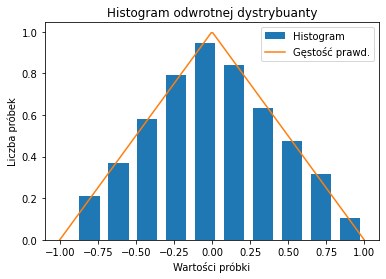

In [202]:
plt.hist(
    invF(x),
    density=True,
    label="Histogram",
    rwidth=0.7,
    bins=10,
)
plt.plot(x, f(x), label="Gęstość prawd.")
plt.legend()
plt.title("Histogram odwrotnej dystrybuanty")
plt.xlabel("Wartości próbki")
plt.ylabel("Liczba próbek")
plt.show()

## Lab 1.3

Generator:

$$
f(x)=e^{-x}, \ x \ge 0
$$

Dystrybuanta:

$$
F(x)=1-e^{-x}
$$

Odwrócona dystrybuanta:

$$
F^{1}(x)=-ln(1-x)
$$

In [203]:
f = lambda x: np.exp(-x) * (x >= 0)
F = lambda x: -np.exp(-x) + 1
invF = lambda x: -np.log(1 - x) * (x < 1)

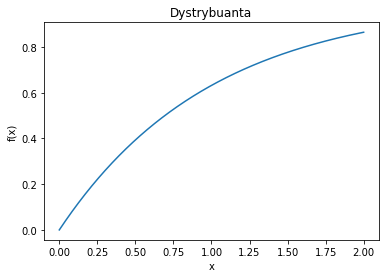

In [204]:
x = np.linspace(0, 2, 1000)
plt.title("Dystrybuanta")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, F(x))
plt.show()

/var/folders/7g/57qghjmj7x3ft0pqvb_k6lcw0000gn/T/ipykernel_27634/3624635529.py:3: RuntimeWarning: invalid value encountered in log
  invF= lambda x: -np.log(1-x)*(x<1)


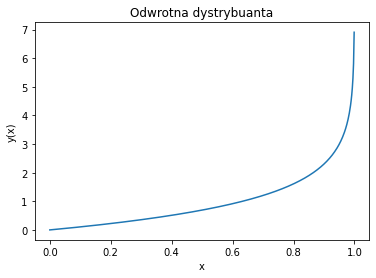

In [205]:
plt.title("Odwrotna dystrybuanta")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.plot(x, invF(x))
plt.show()

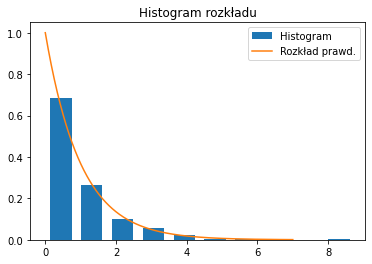

In [206]:
n = 1000
x = np.linspace(0, 7, n)

plt.title("Histogram rozkładu")
plt.hist(
    invF(np.random.uniform(0, 1, n)),
    rwidth=0.7,
    density=True,
    bins=10,
    label="Histogram",
)
plt.plot(x, f(x), label="Rozkład prawd.")
plt.legend()
plt.show()

## Lab 1.4

Rozkład:

$$
f(x)=\frac{1}{2}e^{-|x|}
$$

Dystrybuanta:

$$
F(x) =
  \begin{cases}
    \frac{1}{2}+\frac{1}{2}(1-e^{-x}) & \quad x \in [0,\infty)\\
    \frac{1}{2}-\frac{1}{2}(1-e^{-x}) & \quad x\in (-\infty, 0)
  \end{cases}
$$

Odwrotna dystrybuanta:

$$
F(x) =
  \begin{cases}
    -ln(1-x) & \quad x \in [0,\infty)\\
    ln(1+x) & \quad x\in (-\infty, 0)
  \end{cases}
$$

In [207]:
def f(x):
    return (1 / 2) * np.exp(-np.abs(x))


def F(x):
    return (1 / 2) * np.exp((x)) * (x <= 0) + (1 - (1 / 2) * np.exp((-x))) * (x > 0)


def invF(x):
    return np.log(2 * x) * (x <= (1 / 2)) * (x > 0) + -np.log(2 - 2 * x) * (
        x > (1 / 2)
    ) * (x < 1)

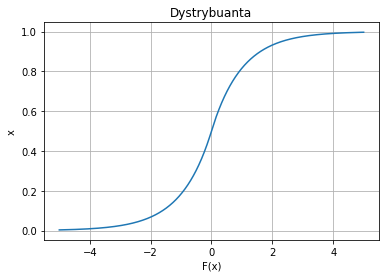

In [208]:
n = 1000
x = np.linspace(-5, 5, n)

plt.title("Dystrybuanta")
plt.ylabel("x")
plt.xlabel("F(x)")
plt.plot(x, F(x))
plt.grid(True)
plt.show()

/var/folders/7g/57qghjmj7x3ft0pqvb_k6lcw0000gn/T/ipykernel_27634/1417938740.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(2 * x) * (x <= (1 / 2)) * (x > 0) + -np.log(2 - 2 * x) * (x > (1 / 2)) * (


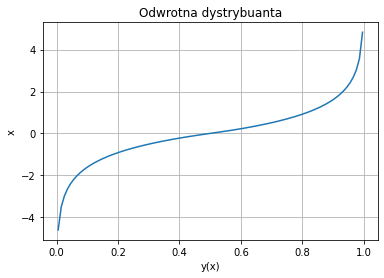

In [209]:
plt.title("Odwrotna dystrybuanta")
plt.ylabel("x")
plt.xlabel("y(x)")
plt.plot(x, invF(x))
plt.grid(True)
plt.show()

/var/folders/7g/57qghjmj7x3ft0pqvb_k6lcw0000gn/T/ipykernel_27634/1417938740.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(2 * x) * (x <= (1 / 2)) * (x > 0) + -np.log(2 - 2 * x) * (x > (1 / 2)) * (


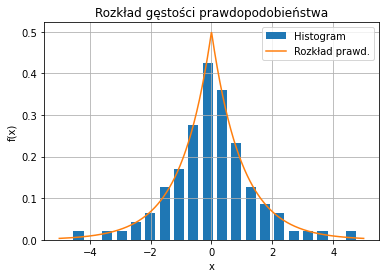

In [210]:
plt.hist(invF(x), rwidth=0.7, density=True, bins=20, label="Histogram")
plt.title("Rozkład gęstości prawdopodobieństwa")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.plot(x, f(x), label="Rozkład prawd.")
plt.legend()
plt.show()

## Lab1.5

Metoda odwrotnej dystrybuanty jest kłopotliwa z powodu konieczności odwracania dystrybuanty co moe być czasochłonne i kosztowne.

## Lab 2

## Lab 2.1

Rozkład gęstości:

$$
f(x) =
  \begin{cases}
    x+1 & \quad x \in [0,\infty)\\
    -x+1 & \quad x\in (-\infty, 0)\\
    0 & \quad x \in (-\infty, -1]\cup(1, \infty)
  \end{cases}
$$

Funkcja ograniczająca:

$$
g(x)=\frac{1}{2}e^{-|x|}
$$

In [211]:
0.5 * np.exp(0)  # tak wiec C = 2

0.5

In [212]:
n = 200
C = 2  # skalujemy
x = np.linspace(-1, 1, 100)
f = lambda x: (x + 1) * (-1 < x) * (x < 0) + (-x + 1) * (0 <= x) * (x < 1) + 0
g = lambda x: C * 0.5 * np.exp(-np.abs(x))

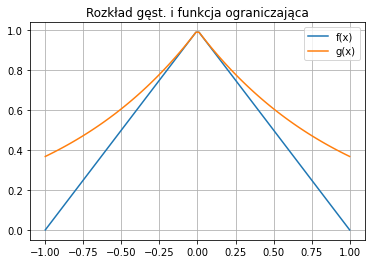

In [213]:
plt.title("Rozkład gęst. i funkcja ograniczająca")
plt.plot(x, f(x), label="f(x)")
plt.plot(x, g(x), label="g(x)")
plt.grid(True)
plt.legend()
plt.show()

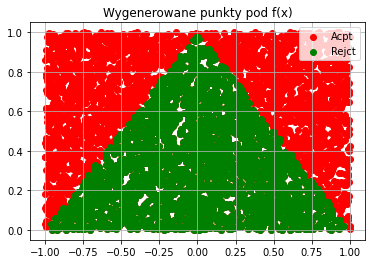

In [214]:
n = 5000
ls = -1
rs = 1
x = np.random.uniform(ls, rs, n)
y = np.random.uniform(0, rs, n)

# Super metoda dzieki ktorej dostajemy indeksy
# ktore spelniaja dany condition
(idx,) = np.where(y <= f(x))
xv = x[idx]
yv = y[idx]
plt.title("Wygenerowane punkty pod f(x)")
plt.scatter(x, y, color="red", label="Acpt")
plt.scatter(xv, yv, color="green", label="Rejct")
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


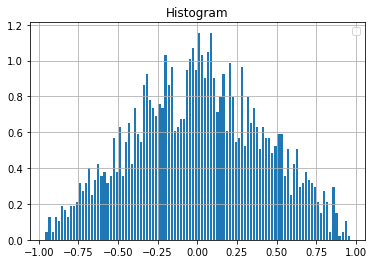

In [215]:
plt.hist(xv, rwidth=0.7, density=True, bins=100)
plt.title("Histogram")
plt.grid(True)
plt.legend()
plt.show()

## Lab 2.2

In [224]:
f = lambda x: 50 * (x > 0) * (x <= (1 / 100)) + (0.5 / 0.99) * (x > (1 / 100)) * (
    x <= (1)
)

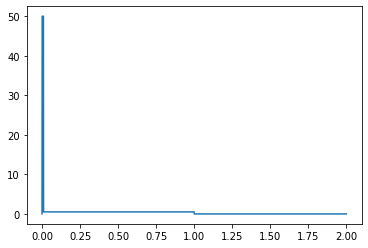

In [225]:
n = 2000
x = np.linspace(0, 2, n)
plt.plot(x, f(x))
plt.show()

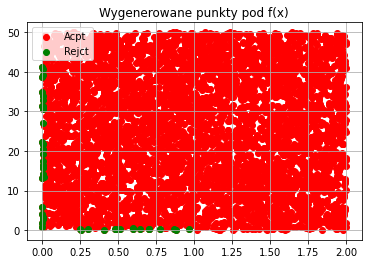

In [237]:
n = 5000
ls = 0
rs = 50
x = np.random.uniform(ls, 2, n)
y = np.random.uniform(ls, rs, n)


(idx,) = np.where(y <= f(x))
xv = x[idx]
yv = y[idx]
plt.title("Wygenerowane punkty pod f(x)")
plt.scatter(x, y, color="red", label="Acpt")
plt.scatter(xv, yv, color="green", label="Rejct")
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


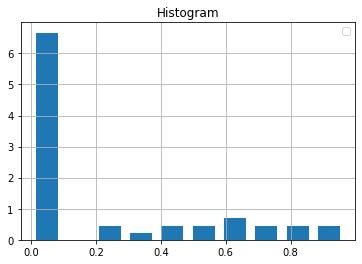

In [238]:
plt.hist(xv, rwidth=0.7, density=True, bins=10)
plt.title("Histogram")
plt.grid(True)
plt.legend()
plt.show()

## Lab 2.3

In [252]:
r = 1
f = lambda x: np.sqrt(r**2 - x**2)

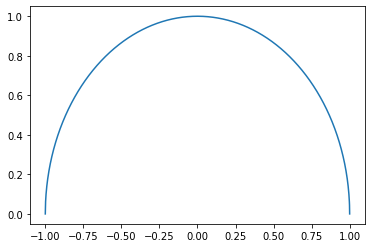

In [253]:
n = 2000
x = np.linspace(-1, 1, n)
plt.plot(x, f(x))
plt.show()

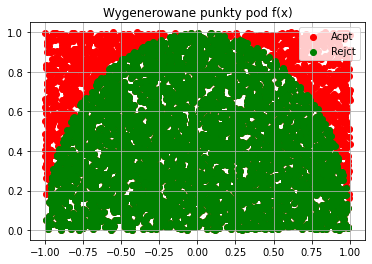

In [257]:
n = 5000
ls = -1
rs = 1
x = np.random.uniform(ls, 1, n)
y = np.random.uniform(0, rs, n)


(idx,) = np.where(y <= f(x))
xv = x[idx]
yv = y[idx]
plt.title("Wygenerowane punkty pod f(x)")
plt.scatter(x, y, color="red", label="Acpt")
plt.scatter(xv, yv, color="green", label="Rejct")
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


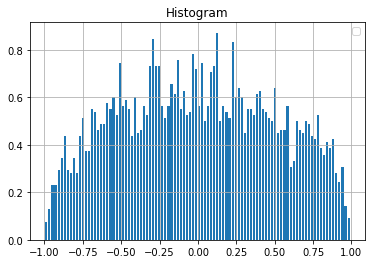

In [259]:
plt.hist(xv, rwidth=0.7, density=True, bins=100)
plt.title("Histogram")
plt.grid(True)
plt.legend()
plt.show()

## Lab 2.4

In [264]:
f = lambda x: 1 / (np.sqrt(2 * np.pi)) * np.exp(-(x ^ (2)) / 2)
# Nie wiem czemu ale nie daje rady tego zaimplementowac i dostaje bledy :C

In [265]:
# n = 2000
# x = np.linspace(-1, 1, n)
# plt.plot(x, f(x))
# plt.show()

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Lab 3

## Lab3.1

In [267]:
n = [10, 100, 10**3, 10**4, 10**5, 10**6]


def exp_val_est(x):
    return np.sum(x) / len(x)


def weigth_est(x):
    avg = exp_val_est(x)
    return np.sum(np.square(x - avg)) / len(x)


def var_est(x):
    avg = exp_val_est(x)
    return np.sum(np.square(x - avg)) / (len(x) - 1)


for n_of_samples in n:
    samples = np.random.standard_cauchy(n_of_samples)

    est_ex = exp_val_est(samples)
    est_wvar = weigth_est(samples)
    est_var = var_est(samples)

    print(
        f"Estimates for n = {n_of_samples}\n"
        f"Expected Value Est. = {est_ex}\n"
        f"Weighted Variance Est. = {est_wvar}\n"
        f"Variance Est. = {est_var}\n"
    )

Estimates for n = 10
Expected Value Est. = -0.4420679637091071
Weighted Variance Est. = 25.09848887241178
Variance Est. = 27.887209858235313

Estimates for n = 100
Expected Value Est. = -0.3795482154802589
Weighted Variance Est. = 37.14260070694446
Variance Est. = 37.51777849186308

Estimates for n = 1000
Expected Value Est. = -0.8297957159672416
Weighted Variance Est. = 466.38983159266
Variance Est. = 466.85668828094094

Estimates for n = 10000
Expected Value Est. = -0.7313035379079778
Weighted Variance Est. = 5607.9311582471555
Variance Est. = 5608.4920074479005

Estimates for n = 100000
Expected Value Est. = -0.9770451700313554
Weighted Variance Est. = 36034.18564413948
Variance Est. = 36034.54598959938

Estimates for n = 1000000
Expected Value Est. = -2.113251070113879
Weighted Variance Est. = 6758831.493887542
Variance Est. = 6758838.252725795



In [ ]:
def generate_sets(avg, std_dev, num_of_sets, n):
    set_list = []
    for i in range(num_of_sets):
        random_set = np.random.normal(avg, std_dev, n)
        set_list.append(random_set)
    return set_list


def empirical_error(avg, std_dev, num_of_sets, n, mode):
    observations = generate_sets(avg, std_dev, num_of_sets, n)
    est_values = np.empty(num_of_sets)
    error = 0

    if mode == 1:
        for i in range(num_of_sets):
            est_values[i] = exp_val_est(observations[i])
        error = np.sum(np.square(est_values - avg)) / num_of_sets

    elif mode == 2:
        for i in range(num_of_sets):
            est_values[i] = weighted_var_est(observations[i])
        error = np.sum(np.square(est_values - std_dev**2)) / num_of_sets

    elif mode == 3:
        for i in range(num_of_sets):
            est_values[i] = var_est(observations[i])
        error = np.sum(np.square(est_values - std_dev**2)) / num_of_sets

    else:
        print(f"blad")

    return error